In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')


In [3]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [ ]:
# Select only relevant numeric columns
df_numeric = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH']]

#check if any null values
df_numeric.isna().sum()


SALES              0
QUANTITYORDERED    0
PRICEEACH          0
dtype: int64

In [6]:

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
df_scaled

array([[-0.37082523, -0.52289086,  0.5969775 ],
       [-0.42789707, -0.11220131, -0.11445035],
       [ 0.17944282,  0.60650538,  0.54938372],
       ...,
       [ 1.01202368,  0.81185016,  0.81015797],
       [-0.78072155, -0.11220131, -1.06186404],
       [-0.25763729,  1.2225397 , -0.89925195]])

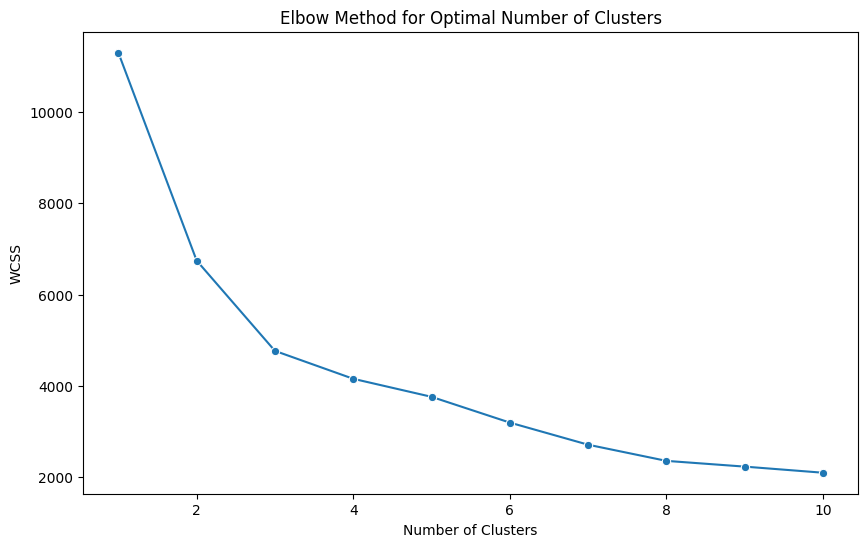

In [ ]:
wcss = []
for i in range(1, 11): #iterating over 1 to 10 k's (where k=number of clusters) for calculating within cluster sum of squares (WCSS) and append it to wcss array  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) #init for selecting centrioids farthest from current 
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#

In [ ]:
# Assuming the elbow method suggests 3 clusters
optimal_clusters = 3 
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)


In [18]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Cluster
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,0
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,0
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,2
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,2
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small,0
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,0
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,2
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small,1


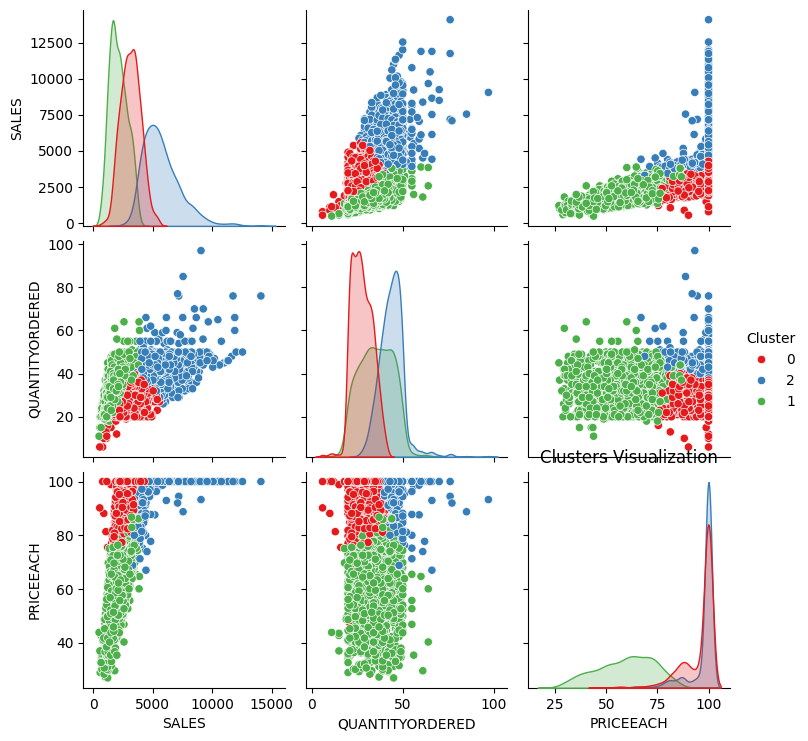

In [ ]:
# Add cluster labels to the original dataframe
df['Cluster'] = df['Cluster'].astype(str)  # Converting  into string for better plotting

# Plotting
sns.pairplot(df, vars=['SALES', 'QUANTITYORDERED', 'PRICEEACH'], hue='Cluster', palette='Set1') #hue used for using different colour for different clusters
plt.title('Clusters Visualization')
plt.show()
